# Predicting Earthquake Damage
### Data Mining I- Fall 2019
### Madhav Sigdel
### Data Mining I Summary


In this project, I use the Random Forest model to analyzed the dummy variables has_superstructure_adobe_mud, has_superstructure_mud_mortar_stone, has_superstructure_stone_flag, has_superstructure_cement_mortar_stone, has_superstructure_mud_mortar_brick, has_superstructure_cement_mortar_brick,has_superstructure_timber, has_superstructure_bamboo, has_superstructure_rc_non_engineered,  has_superstructure_rc_engineered, and has_superstructure_other.   

I include the one variable at a time in the Random Forest model and record the micro f-1 score for every case. I find the not very different results when add the dummy variables to our model. The base model for comparison the f1 score which with all of the variables included in the model give f-1 score of 0.7313. I then drop has_superstructure_#### variable one at a time and see how the model score decrease. I find that the model score do not change by a lot when dropping this dummy variables. The f-1 score stay about the same range 0.73. I conclude that the dummy variables has_structure_##### is not very statistically significant in the model. Maybe next we should combine many has_structure_#### variables to group all structures by mud or something. I will try in my Random Forest model.

I also run same analysis to find the importance of the continuous variables. geo_level_id's 1,2,3 are important, because f-1 score decrease by the lot when we drop these variables (used as continuous becuase of Bishwas suggest). 

I also run other models like KNN. In future, I do feature engineering and hyperparameter tuning in this model to improve the performance of the model. 

### Results from Random Forest models(for categorical variables)
1. 'has_superstructure_adobe_mud'---------------f1 score: 0.7248983141899669
2. 'has_superstructure_stone_flag'-----------------f1 score: 0.7270215650661278
3. ' has_superstructure_cement_mortar_ston'----f1 score: 0.7228773886572357
4. 'has_superstructure_mud_mortar_brick'-------f1 score: 0.726535519684838
5. ' has_superstructure_cement_mortar_brick'---f1 score: 0.726893658386841

6. 'has_superstructure_timber'---------------------f1 score: 0.726689007699982
7. 'has_superstructure_bamboo'------------------f1 score: 0.7285820265534266
8. 'has_superstructure_rc_non_engineered'------f1 score: 0.7232866900309535
9. 'has_superstructure_rc_engineered'------------f1 score: 0.7255634289222583
10. 'has_superstructure_other'----------------------f1 score: 0.7254866849146863

11. 'has_secondary_use'-----------------------------f1 score: 0.7256657542656879
12. 'has_superstructure_mud_mortar_stone-------f1 score: 0.7273285410964161




## For continous variables
We also analyzed the moddel on continous vairables 'geo_level_1_id','geo_level_2_id', 'geo_level_3_id',
'count_floors_pre_eq', 'age','area_percentage', 'height_percentage','count_families'.


We get following results geo level Id.

1. For.  Geo level_1--------f1 score: 0.7141029904581617
2. For.  Geo level_2--------f1 score: 0.7175053081271904
3. For.  Geo level_3.  ID---f1 score: 0.7096262566831238


When we drop 'area_percentage', 'height_percentage','count_families'one by one we get
we get following result.

1. When we drop, area_pecentage-----f1 score: 0.7318052748714537
2. When we drop, 'height_percentage--f1 score: 0.7287355145685708
3. When we drop 'count_families---f1 score: 0.7309099281164463



## For Target Variables
We put damage_gradde_1 and damaga_grade_2 in one bin and damage_grade_3 in another bin and we see that accuracy score go up by significant percentage.
1. damage_grade_3 vs other(1 and 2 in one bin)r------ f1 score: 0.8001841856181731
2. damage_grade_1 vs other(3 and 2 in one bin)------f1 score: 0.9254559873116575


## Madhav Sigdel
### Data Mining I- Fall 2019

This notebook is written for a machine learning competition hosted by Driven Data, named 'Richter's Predictor: Modeling Earthquake Damage'. The goal is to accurately predict the level of damage to buildings caused by the Nepal 2015 earthquake based on aspects of building location and construction.

The data was collected through surveys by the Central Bureau of Statistics that work under the National Planning Commission Secretariat of Nepal. This survey boasts one of the largest post-disaster datasets ever collected, containing valuable information on earthquake impacts, household conditions, and socio-economic-demographic statistics.

Training data, training labels, and test data are provided. The goal is to develop a predictive model using the training set and the training labels (the truth). The best model so developed is then used to predict the target variable for the test set. 

Let's start by importing the training data. 

In [34]:
import numpy as np
import pandas as pd
# read from the training data file
features = pd.read_csv("train_values.csv", index_col = 'building_id')
target = pd.read_csv("train_labels.csv",index_col = 'building_id')
features.info()
target.info()
features.head()
#target.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 38 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non-null object
plan_configuration                        2606

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

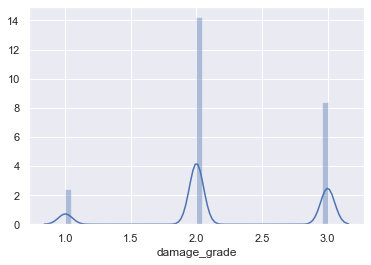

In [33]:
#distribution of damage_grade using seaborn
import seaborn as sns; sns.set()
sns.distplot(target['damage_grade'],kde=True)
target['damage_grade'].value_counts()



Class frequency plot shown above tells us there is a good chance of class imbalance problem in our dataset. We will need to deal with by resampling from the original dataset. WIP! (We will deal with this later.)
Right now, let's explore the dataset by making some plots. To visually explore the continuous features in the dataset, we can use seaborn's pairplot function. We can select the columns that we want to visualize and pairplot them using damage_grade to color code the data. 

In [3]:
print('Correlation Matrix' )
features.corr().head()

Correlation Matrix


,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
geo_level_1_id,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,0.007677,...,-0.019786,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992
geo_level_2_id,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,-0.008743,...,0.017522,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068
geo_level_3_id,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,0.019579,...,0.015995,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463
count_floors_pre_eq,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,-0.041058,...,-0.005294,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073
age,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,0.009129,...,-0.002194,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534


In [4]:
# (features.describe)

## Data Exploration

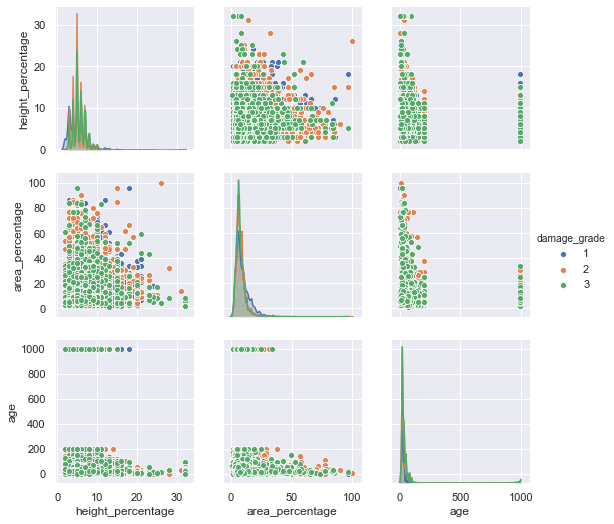

In [5]:
#standard imports for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #plot styling

#select features to pairplot
selected = ['height_percentage',
            'area_percentage',
            'age']

#pair-plot selected variables and color by 'damage_grade' 
#the target variable needs to be cast as categorical, dtype int will not work
sns.pairplot(features.join(target.astype('category')), hue = 'damage_grade',vars = selected)

In [6]:
pd.DataFrame(features.join(target)).groupby('damage_grade')['geo_level_1_id'].value_counts()

damage_grade  geo_level_1_id
1             26                8028
              20                3311
              6                 2108
              13                1966
              10                1211
                                ... 
3             5                  230
              24                 132
              28                 108
              19                  66
              29                  39
Name: geo_level_1_id, Length: 92, dtype: int64

In [7]:
features.join(target).groupby('damage_grade')['foundation_type'].value_counts()

damage_grade  foundation_type
1             r                   10720
              i                    6004
              w                    4353
              u                    3689
              h                     358
2             r                  125515
              w                    9270
              u                    8541
              i                    4354
              h                     579
3             r                   82961
              u                    2030
              w                    1495
              h                     511
              i                     221
Name: foundation_type, dtype: int64

## Feature Engineering
First step is to preprocess the original dataset. This usually means handling outliers, handling missing values, etc. Looking at the summary info of the feature and target variables, we know we don't have missing values in our dataset. All of our features are either categorical or continuous within a given defined range, so outliers are not an issue. We might however want to select a subset of features, or we might want to engineer some of the features, for instance, by scaling the values of a given feature or adding a feature that is derived from others. We will do some preprocessing and feature engineering next and construct the design matrix from the original traning set.

In [38]:
from sklearn import preprocessing as pp
con = [
    'geo_level_1_id',
           'geo_level_2_id', 
           'geo_level_3_id',
           'count_floors_pre_eq',
           'age',                 
           'area_percentage',
           'height_percentage',
           'count_families'
      ]


X_con = features[con]
X_con

sc = pp.MinMaxScaler()


X_con = sc.fit_transform(X_con)  
X_con

cat = [
      'land_surface_condition', 
          'foundation_type', 
          'roof_type',                           
           'ground_floor_type','geo_level_1_id',
           'geo_level_2_id', 
           'geo_level_3_id', 
            'other_floor_type', 
            'position',     
            'plan_configuration', 
            'has_superstructure_stone_flag',
            'has_superstructure_mud_mortar_stone',
            'has_superstructure_cement_mortar_stone',
            'has_superstructure_adobe_mud',
            'has_superstructure_mud_mortar_brick',
            'has_superstructure_cement_mortar_brick',    
            'has_superstructure_timber',
            'has_superstructure_bamboo',
            'has_superstructure_rc_non_engineered',
            'has_superstructure_rc_engineered',
            'has_superstructure_other',
            'has_secondary_use'
      ] 

X_cat = features[cat]
X_cat = pd.get_dummies(X_cat, prefix_sep='_', drop_first=True)
X_cat   

# g = features['has_superstructure_adobe_mud'] | features['has_superstructure_mud_mortar_stone']|features['has_superstructure_mud_mortar_brick']
# g=pd.get_dummies(g, prefix_sep='_', drop_first=True)
# g

# x = ['has_superstructure_adobe_mud',
#          'has_superstructure_stone_flag',
#          'has_superstructure_mud_mortar_brick',
#          'has_superstructure_cement_mortar_brick',
#          'has_superstructure_bamboo',
#          'has_superstructure_rc_non_engineered',
#          'has_secondary_use']      
# X1 = features[x]
# X1 = pd.get_dummies(X1, prefix_sep='_', drop_first=True)  
# X1

#X_con

y = target['damage_grade']

# mask1 = target['damage_grade'] ==1
# mask1
# y=mask1

X = np.concatenate((X_con,X_cat), axis=1)
# X.shape
X[:1,:]
# X_cat.head() 

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,count_families
building_id,,,,,,,,
802906,6,487,12198,2,30,6,5,1
28830,8,900,2812,2,10,8,7,1
94947,21,363,8973,2,10,5,5,1
590882,22,418,10694,2,10,6,5,1
201944,11,131,1488,3,30,8,9,1
...,...,...,...,...,...,...,...,...
688636,25,1335,1621,1,55,6,3,1
669485,17,715,2060,2,0,6,5,1
602512,17,51,8163,3,55,6,7,1


In [9]:
# do the local test-train split for cross-validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=32)
X_train[:1]

array([[8.66666667e-01, 2.73300631e-02, 7.26744649e-01, 2.50000000e-01,
        5.02512563e-03, 1.81818182e-01, 2.33333333e-01, 3.33333333e-01,
        2.60000000e+01, 3.90000000e+01, 9.13300000e+03, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

## Baseline Model
Now that we have produced our training set and test set, let's build a simple baseline model using Random Forest Classifier on the traning set using scikit learn's RandomForestClassifier  that can handle a target variable with multiple categories.  We test the model accuracy by f1_score by using scikit learn on the test set and  also print classification report by using scikit learn to see precision, recall,macro and weighted average.

In [10]:
#standard imports from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#make a pipeline
pipeline = make_pipeline(RandomForestClassifier(random_state=32))
pipeline

Pipeline(memory=None,
         steps=[('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators='warn', n_jobs=None,
                                        oob_score=False, random_state=32,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [11]:
#construct parameter grid
param_grid = {'randomforestclassifier__n_estimators': [10],
              'randomforestclassifier__min_samples_leaf': [3]}
gs = GridSearchCV(pipeline, param_grid, cv=8)
gs.fit(X_train, y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('randomforestclassifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
   

In [12]:
#print f-1 score using the best model
#get the test data and generate predictions
from sklearn.metrics import accuracy_score, f1_score 
y_pred = gs.predict(X_test)
print(gs.best_params_)
f1 = f1_score(y_test, y_pred, average ='micro')
print(f'f1 score: {f1}')


{'randomforestclassifier__min_samples_leaf': 3, 'randomforestclassifier__n_estimators': 10}
f1 score: 0.7299890000255813


In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 1732  2047    62]
 [  722 18769  2595]
 [   78  5051  8035]]
              precision    recall  f1-score   support

           1       0.68      0.45      0.54      3841
           2       0.73      0.85      0.78     22086
           3       0.75      0.61      0.67     13164

    accuracy                           0.73     39091
   macro avg       0.72      0.64      0.67     39091
weighted avg       0.73      0.73      0.72     39091



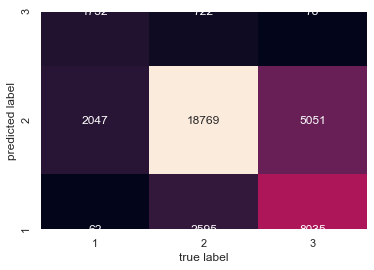

In [14]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[1,2,3],
            yticklabels=[3,2,1])
plt.xlabel('true label')
plt.ylabel('predicted label');

In [15]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# clf = SVC(kernel='linear')
# clf.fit(X_train,y_train)
# y_pred = clf.predict(x_test)

# y_pred
# print(accuracy_score(y_test,y_pred))

## KNN Classifier
We used KNN classifier on the traning set using scikit learn's RandomForestClassifier that can handle a target variable with multiple categories. We found that model accuracy go down when we use KNN Classifier
#Under everthing same
1. f1 score when we use Random Forest Classifier----f1 score: 0.7299890000255813
2. f1 score when we use KNN Classifier----------------f1 score: 0.7154588012586017--

In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:

y_pred = KNN.predict(X_test)



from sklearn.metrics import accuracy_score, f1_score 
f1 = f1_score(y_test, y_pred, average ='micro')
print(f'f1 score: {f1}')

f1 score: 0.7192960016372055


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 2012  1690   139]
 [ 1131 17464  3491]
 [  148  4374  8642]]
              precision    recall  f1-score   support

           1       0.61      0.52      0.56      3841
           2       0.74      0.79      0.77     22086
           3       0.70      0.66      0.68     13164

    accuracy                           0.72     39091
   macro avg       0.69      0.66      0.67     39091
weighted avg       0.72      0.72      0.72     39091



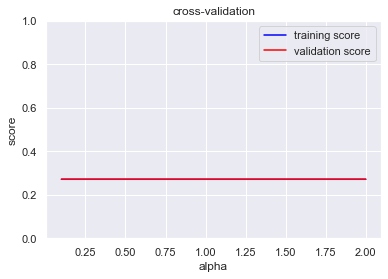

In [26]:
# standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score, f1_score 

#initialize model and set model parameters
model = MultinomialNB()
alpha = np.linspace(0.1,2,10)
k = 6

#get training and validation score 
train_score, val_score = validation_curve(model, X_train, y_train,
                                      'alpha', alpha, cv=k)


#plot the results
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_title('cross-validation')
ax.plot(alpha, np.mean(train_score, 1), 
        color='blue', label='training score')
ax.plot(alpha, np.mean(val_score, 1), 
        color='red', label='validation score')
ax.legend(loc='best')
ax.set_ylim(0, 1)
ax.set_xlabel('alpha')
ax.set_ylabel('score')
#fig.set_size_inches(10, 10.5)
plt.show()

In [27]:
np.mean(val_score)

0.271410826943482